In [1]:
# Imports
import sys
sys.path.append('../../../utils')

from default_imports import *

In [7]:
# Load data
X_train_raw = pd.read_csv('../data/processed/X_train.csv')
y_train = pd.read_csv('../data/processed/y_train.csv')
X_test = pd.read_csv('../data/processed/X_test.csv')

# Ensemble Classification
04_ensemble_classification.ipynb

This notebook aims to create an ensemble model by combining the following classifiers:
- SVC
- k-NN
- Random Forest

Achieved public score: 0.77272

In [8]:
X_train = X_train_raw.drop(columns="PassengerId")
X_train.head()

,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3,Cabin_A,Cabin_B,...,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_nan,Age,SibSp,Parch,Fare
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,-0.589620,0.431350,-0.474326,-0.500240
1,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.644848,0.431350,-0.474326,0.788947
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,-0.281003,-0.475199,-0.474326,-0.486650
3,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.413385,0.431350,-0.474326,0.422861
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.413385,-0.475199,-0.474326,-0.484133


In [9]:
y_train = y_train.to_numpy().ravel()

y_train[:5]

array([0, 1, 1, 1, 0])

## Cross Validation Tuning

### Random Forest

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4], 
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False],
    'criterion': ['gini', 'entropy']
}

rfc = RandomForestClassifier()

grid = GridSearchCV(rfc, param_grid, cv=5)
grid.fit(X_train, y_train)

print(grid.best_params_)

{'bootstrap': False, 'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}


/Users/williamfrisk/miniconda3/envs/ML/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
2160 fits failed out of a total of 6480.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2160 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/williamfrisk/miniconda3/envs/ML/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/williamfrisk/miniconda3/envs/ML/lib/python3.12/site-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/Users/williamfrisk/miniconda3/envs/ML/lib/python3.12/site-packages/sklearn/base.py", line 436, i

### k-NN

In [11]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_neighbors': [3, 5, 7, 10, 15],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': [20, 30, 40],
    'p': [1, 2],
    'metric': ['minkowski', 'euclidean', 'manhattan', 'chebyshev'],
}

knn = KNeighborsClassifier()

grid = GridSearchCV(knn, param_grid, cv=5)
grid.fit(X_train, y_train)

print(grid.best_params_)

{'algorithm': 'auto', 'leaf_size': 20, 'metric': 'minkowski', 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}


## Evaluation

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC


svc = SVC(C=100, gamma='auto', kernel='rbf', class_weight='balanced', probability=True)
rfc = RandomForestClassifier(
    bootstrap=False,
    criterion='gini',
    max_depth=10, 
    max_features='sqrt', 
    min_samples_leaf=1, 
    min_samples_split=5, 
    n_estimators=50)
knn = KNeighborsClassifier(algorithm='auto', leaf_size=20, metric='minkowski', n_neighbors=5, p=2, weights='uniform')

ensemble_clf = VotingClassifier(
    estimators=[
        ('svc', svc),
        ('rfc', rfc),
        ('knn', knn)
    ],
    voting='soft'
)

scores = cross_val_score(ensemble_clf, X_train, y_train, cv=5)

print("Cross-validation scores:")
print(f"Fold scores: {scores}")
print(f"Average score: {np.mean(scores):.4f}")
print(f"Standard deviation: {np.std(scores):.4f}")

Cross-validation scores:
Fold scores: [0.75280899 0.79775281 0.78651685 0.80337079 0.84745763]
Average score: 0.7976
Standard deviation: 0.0305


Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.93      0.91       549
           1       0.89      0.82      0.85       340

    accuracy                           0.89       889
   macro avg       0.89      0.88      0.88       889
weighted avg       0.89      0.89      0.89       889



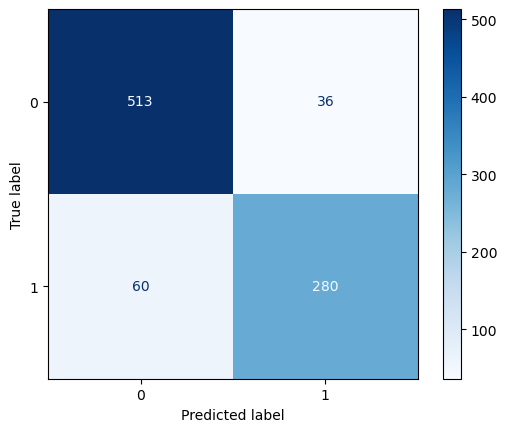

In [42]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, classification_report

ensemble_clf = VotingClassifier(
    estimators=[
        ('svc', svc),
        ('rfc', rfc),
        ('knn', knn)
    ],
    voting='soft'
)
ensemble_clf.fit(X_train, y_train)

y_pred = ensemble_clf.predict(X_train)

cm = confusion_matrix(y_train, y_pred, labels=ensemble_clf.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=ensemble_clf.classes_)
disp.plot(cmap='Blues', values_format='d')

report = classification_report(y_train, y_pred)
print("Classification Report:")
print(report)

## Prediction

In [43]:
ensemble_clf = VotingClassifier(
    estimators=[
        ('svc', svc),
        ('rfc', rfc),
        ('knn', knn)
    ],
    voting='soft'
)
ensemble_clf.fit(X_train, y_train)

y_pred = ensemble_clf.predict(X_test.drop(columns="PassengerId"))

result = pd.DataFrame({
    'PassengerId': X_test["PassengerId"].astype(int),
    'Survived': y_pred
})

result.to_csv('../output/ensemble_classification.csv', index=False)

display(result)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
